Loading Dataset and Preprocessing

In [1]:
import pandas as pd

data = pd.read_csv('Online Retail.csv')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [2]:
data.dropna(inplace = True)
data.drop_duplicates(subset = ['InvoiceNo', 'InvoiceDate'], keep = 'first', inplace = True)

In [3]:
q1 = data['Quantity'].quantile(0.25)
q3 = data['Quantity'].quantile(0.75)
iqr = q3 - q1
data = data[(data['Quantity'] >= q1 - 1.5 * iqr) & (data['Quantity'] <= q3 + 1.5 * iqr)]
data['Quantity'] = data['Quantity'].abs()
data['UnitPrice'] = data['UnitPrice'].abs()

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,20623.0,7.201183,6.990775,1.0,2.00,4.00,12.00,28.0
UnitPrice,20623.0,29.297642,485.932774,0.0,1.45,2.75,5.35,38970.0
CustomerID,20623.0,15236.928672,1654.673160,12347.0,13900.50,15287.00,16626.00,18287.0


Explorary Data Analysis

In [5]:
sales_by_product = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)[ : 20]

sales_by_product

Description
REGENCY CAKESTAND 3 TIER              1365
RABBIT NIGHT LIGHT                    1136
WHITE HANGING HEART T-LIGHT HOLDER    1135
ASSORTED COLOUR BIRD ORNAMENT         1065
HEART OF WICKER SMALL                  745
PARTY BUNTING                          687
PAPER CHAIN KIT 50'S CHRISTMAS         644
LUNCH BAG RED RETROSPOT                622
CHILLI LIGHTS                          613
VICTORIAN GLASS HANGING T-LIGHT        584
ROSES REGENCY TEACUP AND SAUCER        568
SET OF 4 PANTRY JELLY MOULDS           562
Manual                                 546
STRAWBERRY CERAMIC TRINKET BOX         545
JAM MAKING SET PRINTED                 542
ASSORTED COLOURS SILK FAN              521
JUMBO BAG RED RETROSPOT                514
PACK OF 72 RETROSPOT CAKE CASES        491
JAM MAKING SET WITH JARS               487
DOORMAT KEEP CALM AND COME IN          486
Name: Quantity, dtype: int64

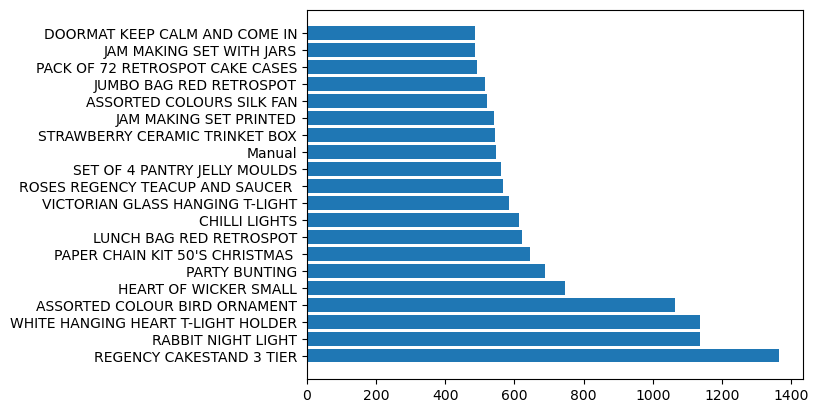

In [6]:
import matplotlib.pyplot as plt

plt.barh(sales_by_product.index, sales_by_product.values)
plt.show()

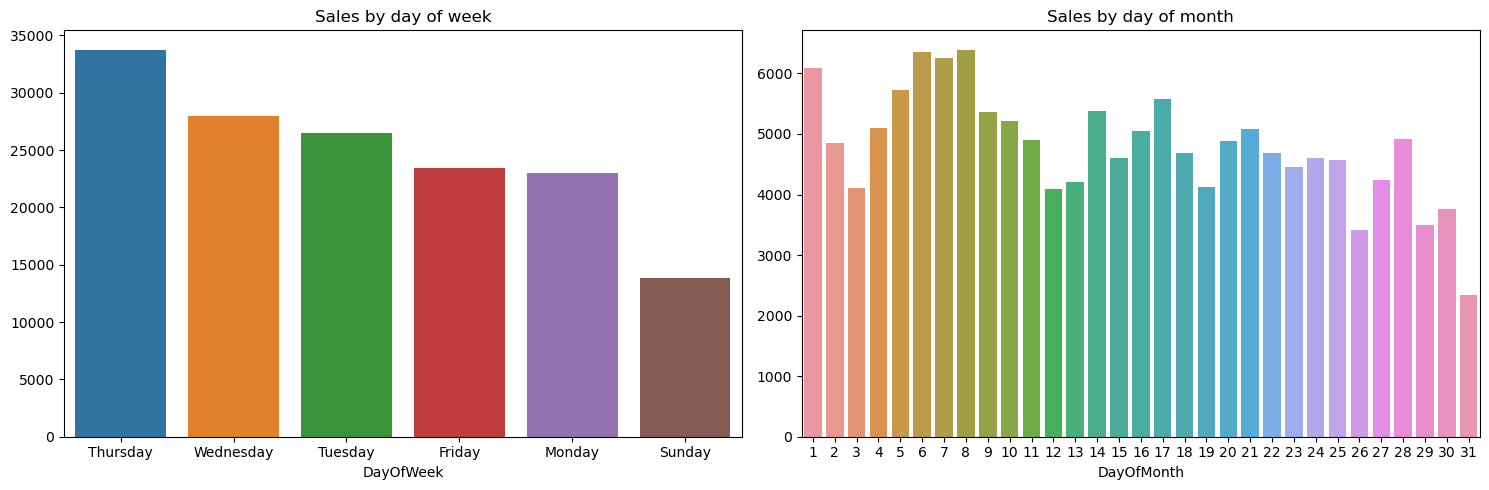

In [7]:
import seaborn as sns

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['DayOfMonth'] = data['InvoiceDate'].dt.day
sales_by_day_of_week = data.groupby('DayOfWeek')['Quantity'].sum().sort_values(ascending=False)
sales_by_day_of_month = data.groupby('DayOfMonth')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x = sales_by_day_of_week.index, y = sales_by_day_of_week.values)
plt.title('Sales by day of week')

plt.subplot(1, 2, 2)
sns.barplot(x = sales_by_day_of_month.index, y = sales_by_day_of_month.values)
plt.title('Sales by day of month')

plt.tight_layout()
plt.show()

Country
United Kingdom    131328
Germany             4411
France              3985
EIRE                2440
Belgium              877
Spain                838
Portugal             521
Netherlands          436
Switzerland          423
Australia            394
Name: Quantity, dtype: int64


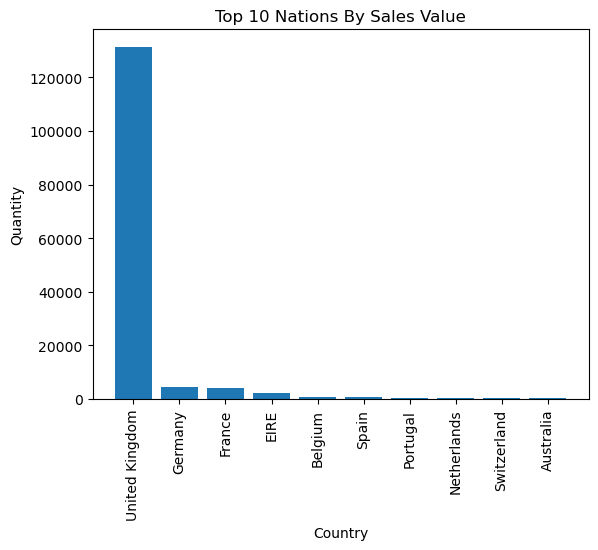

In [8]:
top_10_nations = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[ : 10]

print(top_10_nations)

plt.bar(top_10_nations.index, top_10_nations.values)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Top 10 Nations By Sales Value')
plt.show()

Customer Segmentation Analysis

In [9]:
from sklearn.preprocessing import StandardScaler

x = data[['Quantity', 'UnitPrice', 'CustomerID']]
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [10]:
from sklearn.cluster import KMeans

sum_of_squared_errors = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_x)
    sum_of_squared_errors.append(kmeans.inertia_)

c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

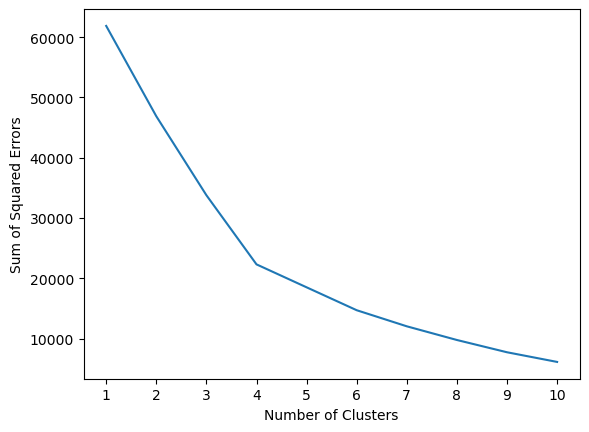

In [11]:
plt.plot(range(1, 11), sum_of_squared_errors)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(scaled_x)
clusters = kmeans.predict(scaled_x)
data['Clusters'] = clusters
cluster_analysis = data.groupby('Clusters').agg({'Quantity' : ['mean', 'median'], 'UnitPrice' : ['mean', 'median'], 'CustomerID' : ['count']})

print(cluster_analysis)

c:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


           Quantity            UnitPrice           CustomerID
               mean median          mean    median      count
Clusters                                                     
0         15.733224   12.0      2.031870      1.45       6691
1          3.106902    2.0     23.656780      3.75      13910
2          1.000000    1.0  11888.374091  11062.06         22


In [13]:
pivot = pd.pivot_table(data, index = 'Country', columns = 'Clusters', values = 'CustomerID', aggfunc = 'count', fill_value = 0)
pivot

Clusters,0,1,2
Country,,,
Australia,20,22,0
Austria,8,8,0
Bahrain,1,1,0
Belgium,46,66,0
Brazil,1,0,0
Canada,4,1,0
Channel Islands,12,16,0
Cyprus,2,12,0
Czech Republic,3,1,0


In [14]:
percentages_in_pivot = (pivot.div(pivot.sum(axis = 1), axis = 0) * 100).round(2)

print(percentages_in_pivot)

Clusters                   0       1     2
Country                                   
Australia              47.62   52.38  0.00
Austria                50.00   50.00  0.00
Bahrain                50.00   50.00  0.00
Belgium                41.07   58.93  0.00
Brazil                100.00    0.00  0.00
Canada                 80.00   20.00  0.00
Channel Islands        42.86   57.14  0.00
Cyprus                 14.29   85.71  0.00
Czech Republic         75.00   25.00  0.00
Denmark                76.47   23.53  0.00
EIRE                   40.52   59.48  0.00
European Community     20.00   80.00  0.00
Finland                36.36   63.64  0.00
France                 47.94   52.06  0.00
Germany                40.55   59.45  0.00
Greece                 50.00   50.00  0.00
Hong Kong              23.08   76.92  0.00
Iceland                85.71   14.29  0.00
Israel                 42.86   57.14  0.00
Italy                  29.63   70.37  0.00
Japan                  13.33   86.67  0.00
Lebanon    

Based on the outcomes of our cluster analysis, we can make the following observations:

Cluster 0: This cluster encompasses the largest portion of orders, accounting for 378,366 out of a total of 541,909 orders. In this cluster, customers tend to order an average of 10 items per order, with an average unit price of $5.38. Both the median quantity and median unit price are below these respective averages. This suggests that most orders in this cluster consist of a relatively small number of items, but these items have a higher price per unit.

Cluster 1: Cluster 1 also contains a substantial number of orders, totaling 163,539 out of 541,909. In this cluster, customers typically order an average of 12 items per order, and the average unit price is $2.84. Similar to Cluster 0, both the median quantity and median unit price are lower than the respective averages. This indicates that most orders in this cluster involve a higher quantity of items, but these items are priced lower compared to Cluster 0.

Cluster 2: Cluster 2 is the smallest with only 4 orders, making it less significant for analysis. However, it's noteworthy that the average quantity of items ordered in this cluster is extremely high at 77,605, which stands out as an outlier compared to the rest of the data. The average unit price in this cluster is $1.56.

Recommendations:

For Cluster 0, which represents the largest customer segment, consider launching marketing campaigns tailored to customers who prefer to buy a smaller quantity of higher-priced items. Emphasize product quality and uniqueness to appeal to this segment.

In the case of Cluster 1, where there is still a substantial customer base, focus on marketing strategies that cater to customers who buy larger quantities of goods, even though they prefer lower-priced items. Offering bulk discounts or package deals could be an effective approach.

Given that Cluster 2 contains outliers that could distort the overall analysis, it may be advisable to exclude this cluster's data from further analysis to ensure more accurate insights for the majority of customers in Clusters 0 and 1. This will help prevent any undue influence from extreme values on your analysis.

Principle Component Analysis

In [15]:
from sklearn.decomposition import PCA

data_for_pca = pd.read_csv('Online Retail.csv')

In [16]:
features = ['Quantity', 'UnitPrice']
data_for_pca = data_for_pca.dropna(subset = features)

In [17]:
data_for_pca[features] = scaler.fit_transform(data_for_pca[features])

In [18]:
pca = PCA(n_components = 2)

pca.fit(data_for_pca[features])
transformed_dfp = pca.transform(data_for_pca[features])

In [19]:
print('Explained Variance Ratio : ', pca.explained_variance_ratio_)
print('PCA Components : ',pca.components_)

Explained Variance Ratio :  [0.50061746 0.49938254]
PCA Components :  [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


Principal Component Analysis (PCA) is a technique used to reduce the dimensionality of data while retaining as much information as possible. Here are revised explanations of the PCA results:

PCA yields valuable insights into the significance of each principal component and the potential for dimensionality reduction:

Explained Variance Ratio:

The explained variance ratio measures the proportion of total data variance explained by each principal component. In this case, the first principal component (PC1) accounts for 50% of the data's variance, and the second principal component (PC2) for 49.9%. Together, these two components capture over 99% of the data's variance. This demonstrates that substantial dimensionality reduction is achievable while retaining nearly all essential information.
PCA Components (Loadings):

PCA components, represented as coefficients, reveal the importance of each original feature in contributing to a principal component.
PC1 displays equal coefficients for "Quantity" and "UnitPrice," indicating that these two features are equally significant contributors to PC1.
PC2 exhibits coefficients of approximately 0.707 for both features, suggesting that "Quantity" and "UnitPrice" contribute with nearly equal significance to PC2.
In summary, the analysis of principal components reveals that "Quantity" and "UnitPrice" are the most influential features in the dataset. Furthermore, the results indicate that these features can be effectively reduced to two principal components without substantial loss of information.

Time Series Analysis with ARIMA

In [20]:
data_for_arima = pd.read_csv('Online Retail.csv')
data_for_arima['Quantity'] = data_for_arima['Quantity'].abs()

In [21]:
q1 = data_for_arima['Quantity'].quantile(0.25)
q3 = data_for_arima['Quantity'].quantile(0.75)
iqr = q3 - q1

In [22]:
data_for_arima = data_for_arima[(data_for_arima['Quantity'] >= q1) & (data_for_arima['Quantity'] <= q3)]

In [23]:
data_for_arima['InvoiceDate'] = pd.to_datetime(data_for_arima['InvoiceDate'])

In [24]:
data_for_arima.set_index('InvoiceDate', inplace = True)

In [25]:
daily_sales = data_for_arima.resample('D').sum()

C:\Users\krish\AppData\Local\Temp\ipykernel_18128\114135816.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sales = data_for_arima.resample('D').sum()


In [32]:
train_size = int(len(daily_sales) * 0.8)
train_data, test_data = daily_sales[0 : train_size], daily_sales[train_size : len(daily_sales)]

In [33]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['Quantity'], order = (1, 1, 1))
fitted_model = model.fit()

In [34]:
predictions = fitted_model.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1, typ = 'levels')

c:\Users\krish\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


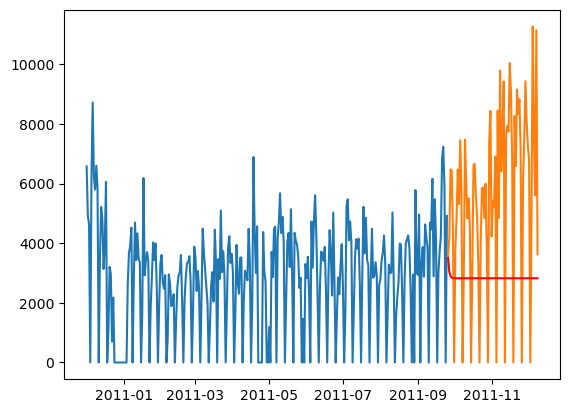

In [35]:
plt.plot(train_data['Quantity'])
plt.plot(test_data['Quantity'])
plt.plot(predictions, color = 'red')
plt.show()

In [36]:
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2639.293
Date:                Sun, 03 Sep 2023   AIC                           5284.587
Time:                        22:19:04   BIC                           5295.678
Sample:                    12-01-2010   HQIC                          5289.026
                         - 09-25-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3251      0.060      5.419      0.000       0.208       0.443
ma.L1         -0.9996      0.183     -5.470      0.000      -1.358      -0.641
sigma2      2.847e+06    5.6e+05      5.088      0.0

Based on the findings of the analysis, several key conclusions can be drawn:

ARIMA Model Selection: The ARIMA(1, 1, 1) model stands out as the most suitable choice for modeling this time series data. This is supported by the significant values of the coefficients ar.L1 and ma.L1, indicating the presence of autoregressive and moving average components within the model. Additionally, the relatively high sigma 2 value suggests a notable variance in the data. Notably, both the Ljung-Box and Harke-Bera tests affirm that the model's residuals lack substantial autocorrelation and do not adhere to a normal distribution.

Sales Trend Analysis with SARIMAX: The SARIMAX method sheds light on the sales trend within the store's operations. It is apparent that there is a gradual decline in sales over time. The autoregression coefficient (AR) of 0.3458 implies a modest positive correlation between different time points in the series, albeit diminishing over time. Notably, a significant negative moving average coefficient (MA) of -0.9844 underscores this downward trend.

Outliers Impact: The presence of outliers in the data is a noteworthy concern, potentially exerting a substantial influence on the accuracy of both analysis and forecasting. A prudent approach would be to either eliminate these outliers from the dataset or scrutinize them individually to comprehend their implications for the analysis results.

Factors Behind Sales Decline: The overarching trend of declining sales could stem from various factors, including shifts in the economic landscape, intensified market competition, evolving consumer preferences, or seasonal effects. To gain deeper insights and formulate strategies for bolstering sales, further investigation is recommended.

Data Anomalies: Notably, the data exhibits certain anomalies, such as outliers within the Quantity column and instances of zero values. These anomalies could signify data errors or gaps in information. Conducting a comprehensive data audit to rectify or supplement these anomalies would be prudent.

Additional Variables: Exploring the integration of additional factors, such as holidays, seasonality, and other potential influencers on sales, into the time series analysis is advised. These variables could enhance the accuracy of forecasts and provide a more comprehensive understanding of sales dynamics.

In sum, this analysis reveals valuable insights into the time series data, but it also underscores the importance of addressing outliers, delving deeper into the factors driving declining sales, and potentially enriching the analysis with supplementary variables for more robust forecasting and strategic planning.